<a href="https://colab.research.google.com/github/RiaKokate/VIS/blob/main/vis_PS0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyzing Air Quality Index (AQI) Trends (2020-2024), Identifying Key Pollutant Contributors and Forecasting (2020–2030)

[DATASET](https://aqs.epa.gov/aqsweb/airdata/download_files.html)

This project aims to explore air quality trends across different counties in the U.S. from 2020 to 2024, identifying key pollutants that contribute to poor air quality. The goal is to use data visualization techniques to uncover patterns, compare states and counties, and assess how pollutants such as CO, NO2, Ozone, PM2.5, and PM10 impact AQI levels.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

from google.colab import files

# Upload the dataset manually
! wget -q -O combined_aqi_data_2020_2024.csv https://docs.google.com/uc?id=1ECzEzKaGHD6dcEfc0W_XiEVlrEG4pmNf&export=download

# Load data into DataFrame (replace with correct filename)
df = pd.read_csv("combined_aqi_data_2020_2024.csv")
years = [2020, 2021, 2022, 2023, 2024]

# Display first few rows
df.head()

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days PM2.5,Days PM10
0,Alabama,Baldwin,2020,269,223,46,0,0,0,0,74,54,38,0,0,178,91,0
1,Alabama,Clay,2020,105,83,22,0,0,0,0,88,56,34,0,0,0,105,0
2,Alabama,DeKalb,2020,364,332,32,0,0,0,0,91,49,37,0,0,309,55,0
3,Alabama,Elmore,2020,197,197,0,0,0,0,0,47,41,31,0,0,197,0,0
4,Alabama,Etowah,2020,276,239,37,0,0,0,0,93,53,36,0,0,191,85,0


In [2]:
# Check data structure
print(df.info())

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Summary statistics
print("\nSummary Statistics:\n", df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4992 entries, 0 to 4991
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   State                                4992 non-null   object
 1   County                               4992 non-null   object
 2   Year                                 4992 non-null   int64 
 3   Days with AQI                        4992 non-null   int64 
 4   Good Days                            4992 non-null   int64 
 5   Moderate Days                        4992 non-null   int64 
 6   Unhealthy for Sensitive Groups Days  4992 non-null   int64 
 7   Unhealthy Days                       4992 non-null   int64 
 8   Very Unhealthy Days                  4992 non-null   int64 
 9   Hazardous Days                       4992 non-null   int64 
 10  Max AQI                              4992 non-null   int64 
 11  90th Percentile AQI                  4992 n

# 1

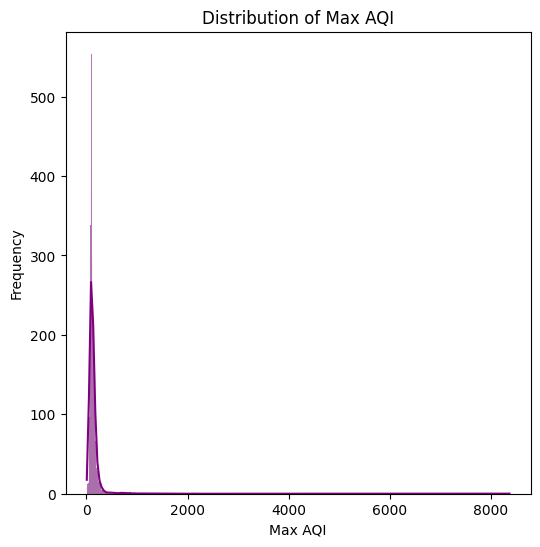

In [3]:
plt.figure(figsize=(6, 6))
sns.histplot(df['Max AQI'], kde=True, color='purple')
plt.title('Distribution of Max AQI')
plt.xlabel('Max AQI')
plt.ylabel('Frequency')
plt.show()

The distribution is highly skewed to the right, meaning most AQI values are relatively low.
However, a small number of extreme values (high AQI) indicate occasional severe pollution events.
These high outliers likely correspond to major pollution incidents, wildfires, or specific regional effects.

# 2

<ipython-input-4-505a5e3b6a26>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='Year', y='Max AQI', ci=None)


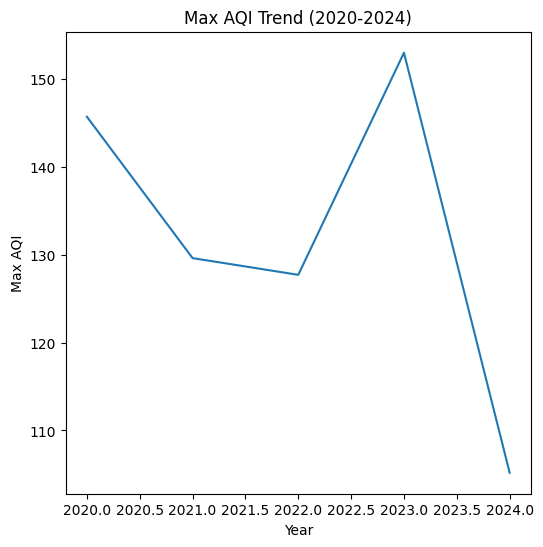

In [4]:
plt.figure(figsize=(6,6))
sns.lineplot(data=df, x='Year', y='Max AQI', ci=None)
plt.title('Max AQI Trend (2020-2024)')
plt.xlabel('Year')
plt.ylabel('Max AQI')
plt.show()

The maximum AQI fluctuated over the years.
It decreased from 2020 to 2022, spiked in 2023, and dropped sharply in 2024.
This indicates varying air pollution levels, possibly influenced by emissions, weather, or policy changes.

# 3

<Figure size 600x600 with 0 Axes>

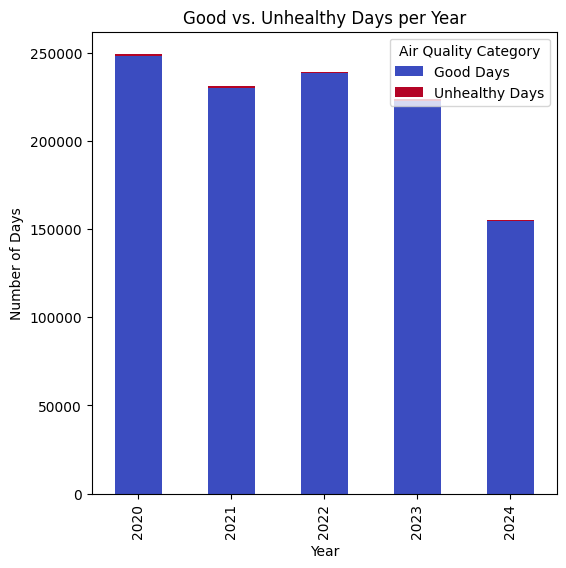

In [5]:
plt.figure(figsize=(6,6))
df_grouped = df.groupby('Year')[['Good Days', 'Unhealthy Days']].sum()

df_grouped.plot(kind='bar', stacked=True, figsize=(6,6), colormap='coolwarm')
plt.title("Good vs. Unhealthy Days per Year")
plt.xlabel("Year")
plt.ylabel("Number of Days")
plt.legend(title="Air Quality Category")
plt.show()

The majority of days each year had good air quality (blue bars).
Unhealthy days (red bars) are present but in small numbers.
2024 shows a significant drop in total recorded days, possibly due to incomplete data or environmental changes.

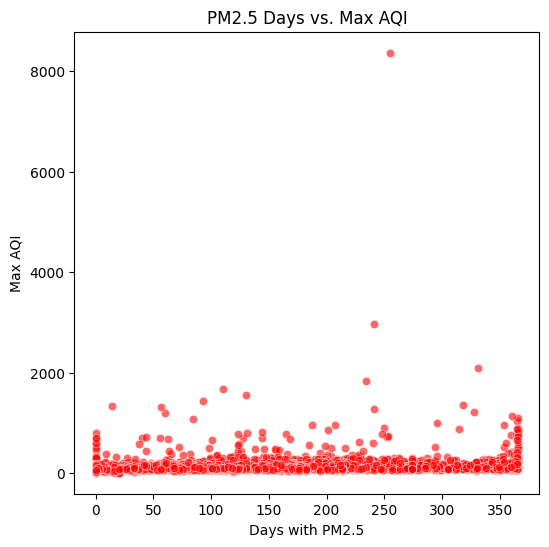

In [6]:
plt.figure(figsize=(6,6))
sns.scatterplot(data=df, x='Days PM2.5', y='Max AQI', alpha=0.6, color="red")
plt.title("PM2.5 Days vs. Max AQI")
plt.xlabel("Days with PM2.5")
plt.ylabel("Max AQI")
plt.show()

There is a visible trend where more PM2.5 days correspond to higher AQI values.
However, extreme outliers exist, with some points having abnormally high AQI values despite moderate PM2.5 exposure.
This suggests that other pollutants or external factors (such as weather conditions) may contribute to AQI spikes.

# 4

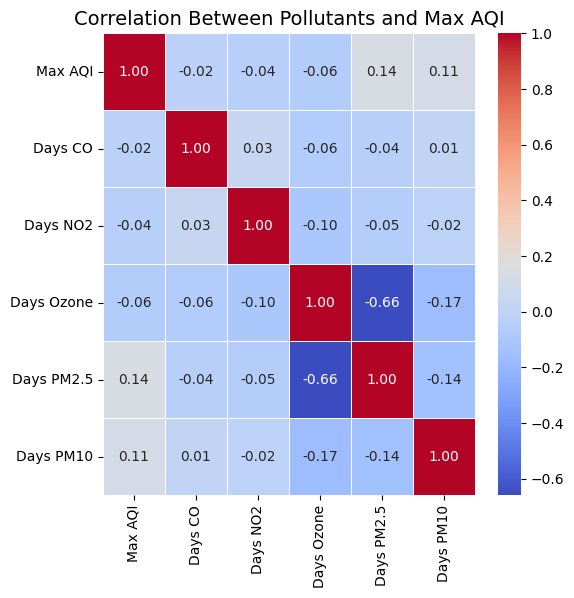

In [7]:
# Compute correlation matrix
corr = df[['Max AQI', 'Days CO', 'Days NO2', 'Days Ozone', 'Days PM2.5', 'Days PM10']].corr()

# Plot correlation heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Between Pollutants and Max AQI", fontsize=14)
plt.show()

PM2.5 has the strongest positive correlation (0.14) with Max AQI, implying its significant role in determining air quality.
Ozone days have a strong negative correlation with PM2.5 (-0.66), indicating an inverse relationship—regions with high ozone pollution tend to have fewer PM2.5 pollution days.
Other pollutants (CO, NO2, PM10) have weak correlations with Max AQI, suggesting their lesser impact or indirect effects on air quality.

Research Question:

1. How has air quality evolved in the U.S. between 2020 and 2024?

2. Which pollutants have the greatest impact on AQI trends?


Hypotheses:

1. Air quality is deteriorating over time, meaning AQI values will show an increasing trend from 2020 to 2024.

2. Certain pollutants (PM2.5, Ozone, NO2) are strong predictors of AQI, and counties with a high number of “Unhealthy Days” will continue to see worsening conditions.

# **🚩TRIALS**

REGRESSION

In [8]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

# Prepare data (same as before)
X = df[['Days CO', 'Days NO2', 'Days Ozone', 'Days PM2.5', 'Days PM10']]
y = df['Max AQI']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit a Lasso regression model
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)

# Coefficients of features after Lasso regularization
lasso_coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso.coef_})
print("\nLasso Feature Coefficients:\n", lasso_coefficients)


Lasso Feature Coefficients:
       Feature  Coefficient
0     Days CO    -0.128054
1    Days NO2    -0.063568
2  Days Ozone     0.188058
3  Days PM2.5     0.348080
4   Days PM10     0.683752


Mean Absolute Error (MAE): 51.12
R-squared (R2): 0.06


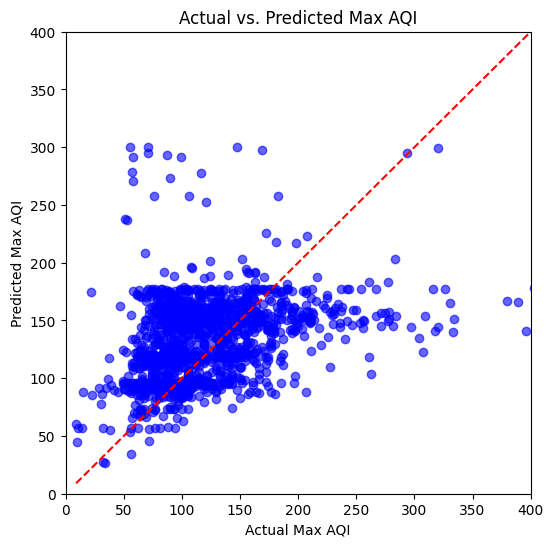

In [9]:
from sklearn.metrics import mean_absolute_error, r2_score

# Predict on the test set
y_pred = lasso.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Plot Actual vs Predicted Max AQI
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlim(0, 400)
plt.ylim(0, 400)
plt.title("Actual vs. Predicted Max AQI")
plt.xlabel("Actual Max AQI")
plt.ylabel("Predicted Max AQI")
plt.show()